<a href="https://www.arduino.cc/"><img src="https://raw.githubusercontent.com/don/tinyml-workshop/master/exercises/images/AI-IOT-devfest-AZ-2020-horiz.png" width=200/></a>
# TinyML on Arduino
## Gesture recognition tutorial
 * Sandeep Mistry - Arduino
 * Don Coleman - Chariot Solutions


https://github.com/don/tinyml-workshop/

## Setup Python Environment

Install up the Python libraries and Linux tools for the code in the notebook.

In [2]:
# Setup environment
#On configure notre environnement en implémentant les librairies pythons nécessairs
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
%tensorflow_version 2.x
!pip install tensorflow

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Upload Data

1. If necessary, open the panel on the left side of Colab by clicking on the __>__
1. Select the files tab in the left panel
1. Drag the `punch.csv` and `flex.csv` files from your computer to the tab to upload them into colab.

# Graph Data (optional)

Plot the CSV data on two separate graphs, acceleration and gyroscope, because each data set has different units and scale.

<ipython-input-3-b6ae07ced09c>:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-3-b6ae07ced09c>:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-3-b6ae07ced09c>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


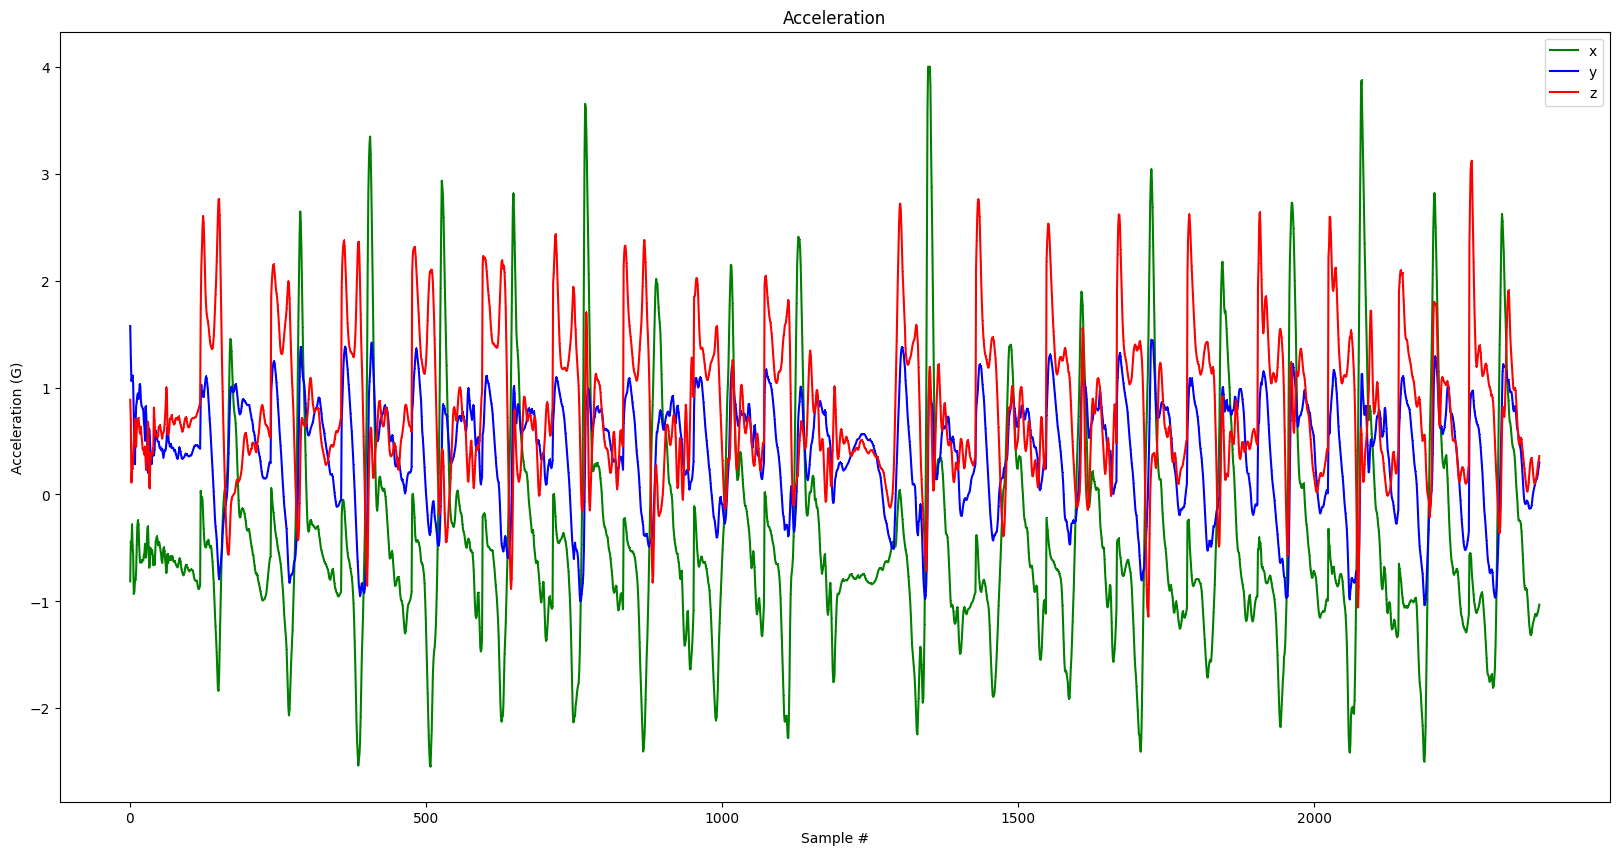

<ipython-input-3-b6ae07ced09c>:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-3-b6ae07ced09c>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-3-b6ae07ced09c>:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')


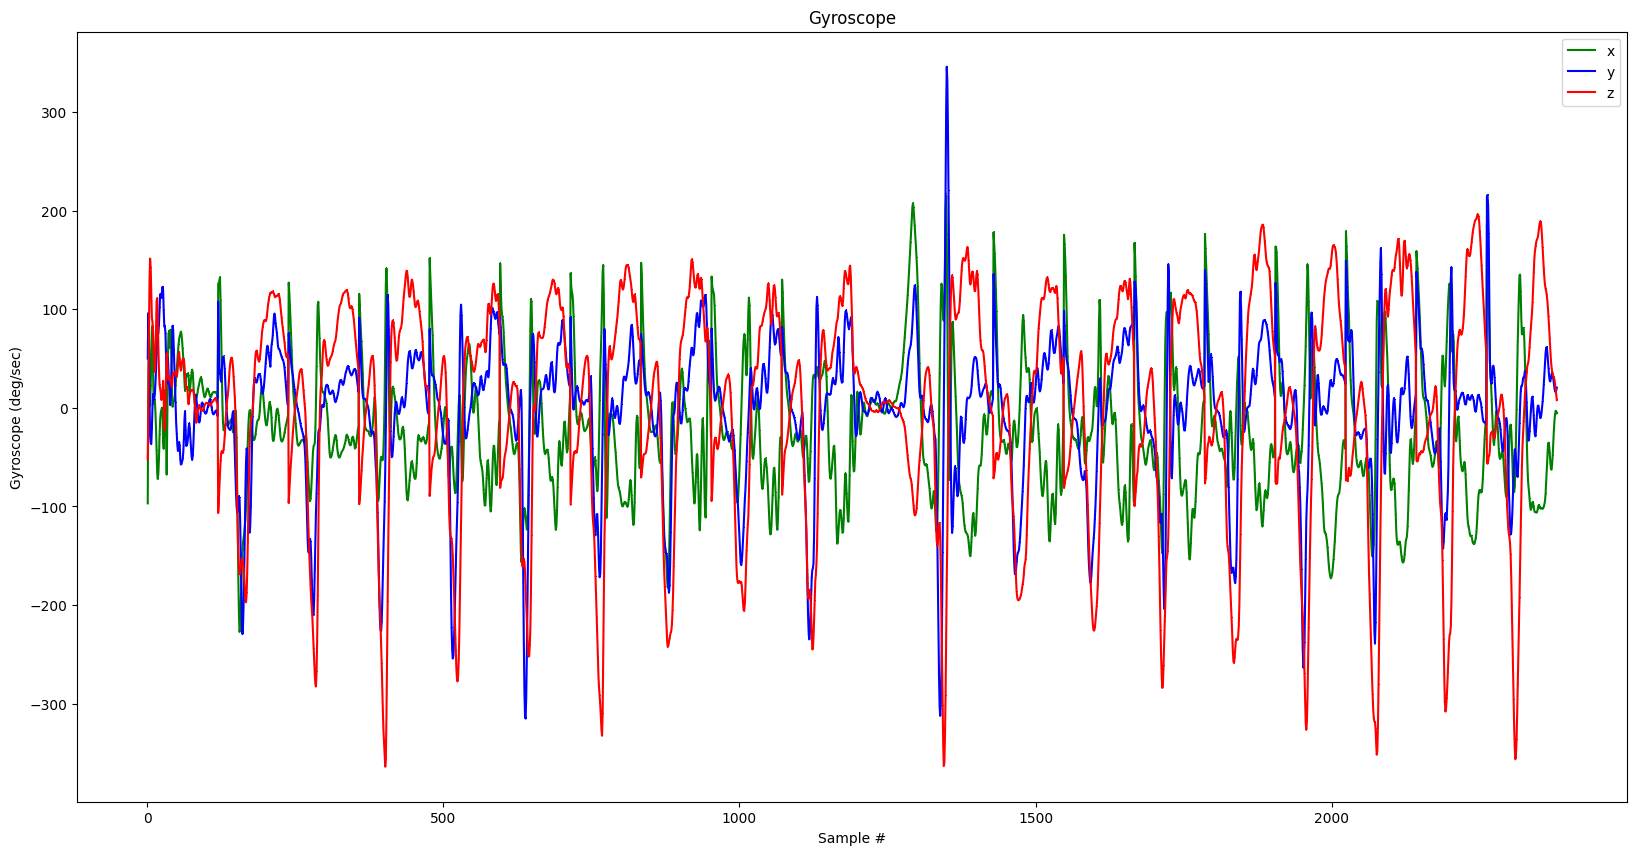

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Pour les yes/no.csv, on a enregistré les données sur 3 axes de l'accéléromètre et du gyroscope pour 20 mouvements de yes/no, répartis dans les fichiers correspondants.
filename = "yes.csv"

# Lecture des données du fichier CSV dans un DataFrame
df = pd.read_csv("/content/" + filename)

# Création d'indices pour les données en utilisant la longueur de la colonne 'aX', accélération selon x
index = range(1, len(df['aX']) + 1)

# Configuration de la taille de la figure pour les graphiques
plt.rcParams["figure.figsize"] = (20,10)

# Tracé du premier graphique (Accélération) (titre, axes,legendes)
plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

# Tracé du deuxième graphique (Gyroscope) de la même manière
plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()


<ipython-input-4-bb664f542fb8>:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-4-bb664f542fb8>:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-4-bb664f542fb8>:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


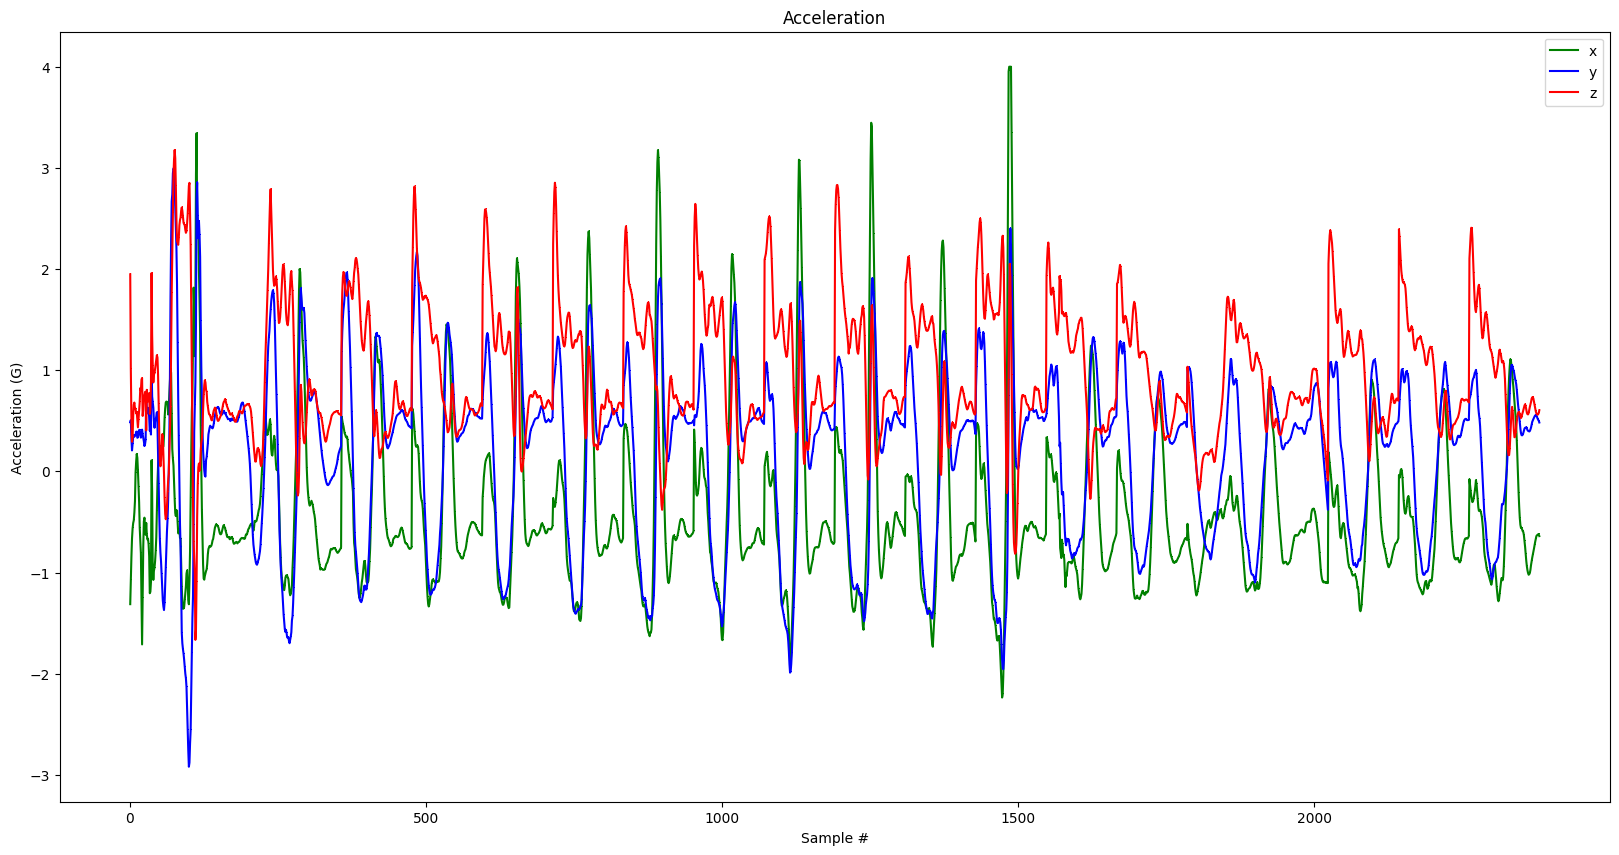

<ipython-input-4-bb664f542fb8>:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-4-bb664f542fb8>:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-4-bb664f542fb8>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')


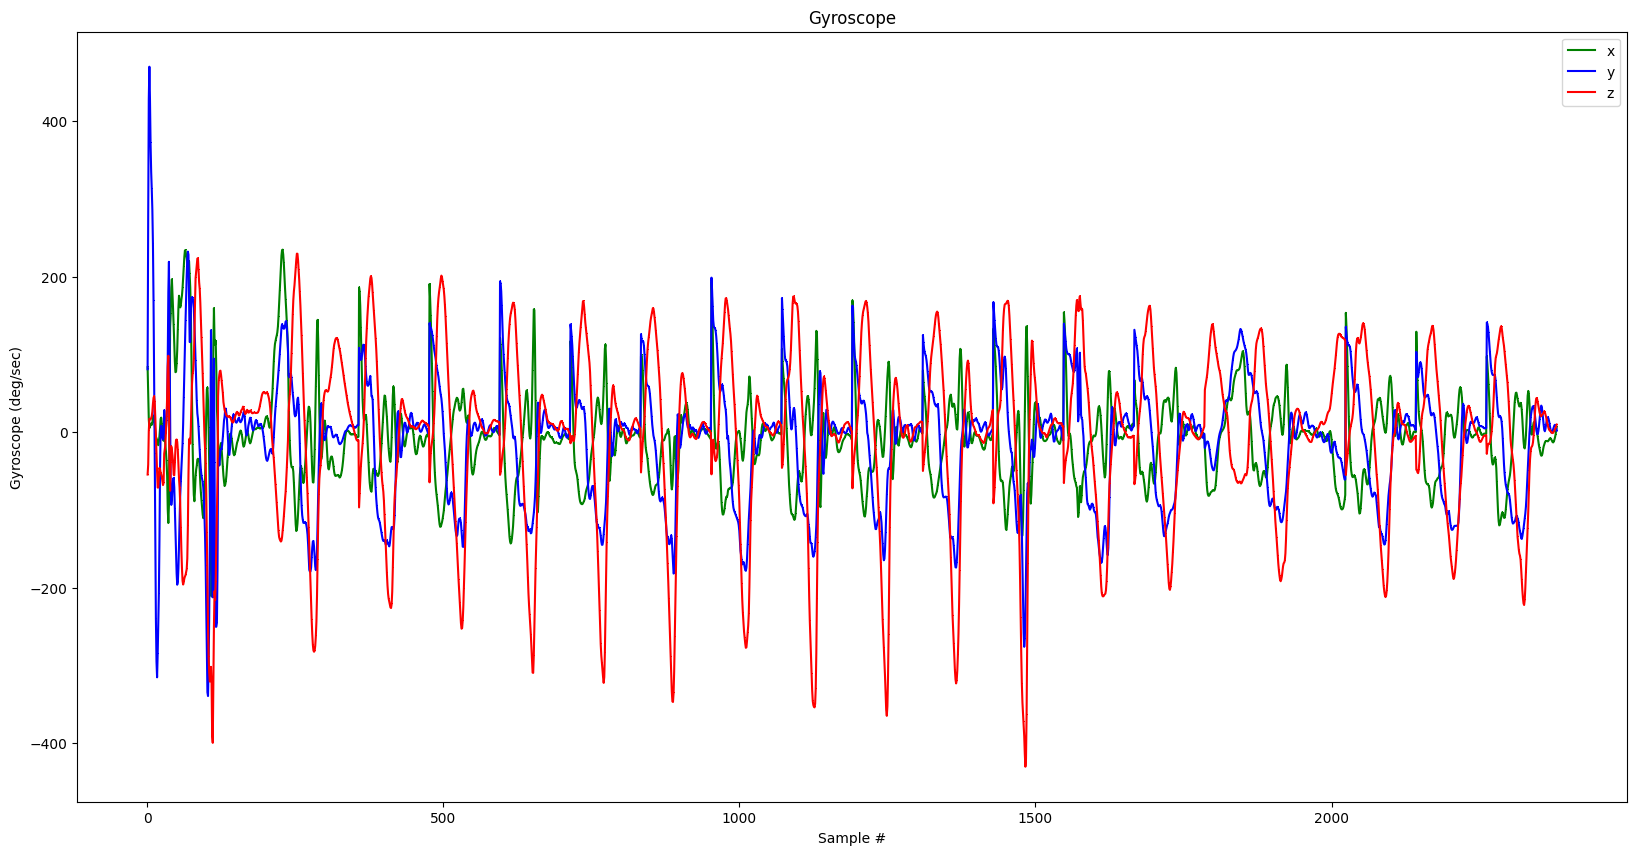

In [4]:
#On réitère le processus pour le fichier no.csv

filename = "no.csv"

df = pd.read_csv("/content/" + filename)

index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()


# Train Neural Network





## Parse and prepare the data

Parse the CSV files and transforms them to a format that can be used to train the fully connected neural network.

If you've recorded additional gestures, update the `GESTURES` list with the names of the additional CSV files.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf



#Préparation des données pour l'entraînement d'un modèle d'apprentissage automatique avec TensorFlow.
#Le script lit des fichiers CSV de gestes, normalise les données d'accélération et de gyroscope
#et organise les entrées et sorties pour le modèle. Les données sont prêtes pour l'entraînement.

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures
GESTURES = [
    "yes",
    "no"
]

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")

  output = ONE_HOT_ENCODED_GESTURES[gesture_index]

  df = pd.read_csv("/content/" + gesture + ".csv")

  # get rid of pesky empty value lines of csv which cause NaN inputs to TensorFlow
  df = df.dropna()
  df = df.reset_index(drop=True)

  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")

  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

TensorFlow version = 2.14.0

Processing index 0 for gesture 'yes'.
	There are 20 recordings of the yes gesture.
Processing index 1 for gesture 'no'.
	There are 20 recordings of the no gesture.
Data set parsing and preparation complete.


## Randomize and split the input and output pairs for training

Randomly split input and output pairs into sets of data: 60% for training, 20% for validation, and 20% for testing.

  - the training set is used to train the model
  - the validation set is used to measure how well the model is performing during training
  - the testing set is used to test the model after training

In [7]:
#Mélange aléatoire des données et division en ensembles d'entraînement, de test et de validation.
#Le script utilise des techniques de randomisation pour assurer une distribution équitable des données
#dans chaque ensemble, favorisant ainsi la généralisation du modèle.


# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


## Build & Train the Model

Build and train a [TensorFlow](https://www.tensorflow.org) model using the high-level [Keras](https://www.tensorflow.org/guide/keras) API.

In [8]:
# build the model and train it

#Création d'un modèle séquentiel avec TensorFlow Keras.


model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
# the final layer is softmax because we only expect one gesture to occur per input
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))
# batch_size : hyperparamètre lié à l'échantillonnage, peut améliorer la qualité de l'entrainement


Epoch 1/600
24/24 [==============================] - 1s 12ms/step - loss: 0.3120 - mae: 0.5110 - val_loss: 0.3245 - val_mae: 0.5430
Epoch 2/600
24/24 [==============================] - 0s 5ms/step - loss: 0.2609 - mae: 0.4848 - val_loss: 0.3407 - val_mae: 0.5488
Epoch 3/600
24/24 [==============================] - 0s 5ms/step - loss: 0.2480 - mae: 0.4780 - val_loss: 0.3963 - val_mae: 0.5672
Epoch 4/600
24/24 [==============================] - 0s 4ms/step - loss: 0.2530 - mae: 0.4717 - val_loss: 0.3519 - val_mae: 0.5530
Epoch 5/600
24/24 [==============================] - 0s 4ms/step - loss: 0.2447 - mae: 0.4537 - val_loss: 0.2576 - val_mae: 0.5055
Epoch 6/600
24/24 [==============================] - 0s 4ms/step - loss: 0.2452 - mae: 0.4876 - val_loss: 0.3303 - val_mae: 0.5427
Epoch 7/600
24/24 [==============================] - 0s 4ms/step - loss: 0.2469 - mae: 0.4670 - val_loss: 0.2873 - val_mae: 0.5228
Epoch 8/600
24/24 [==============================] - 0s 5ms/step - loss: 0.2436 - 

## Verify

Graph the models performance vs validation.


### Graph the loss

Graph the loss to see when the model stops improving.

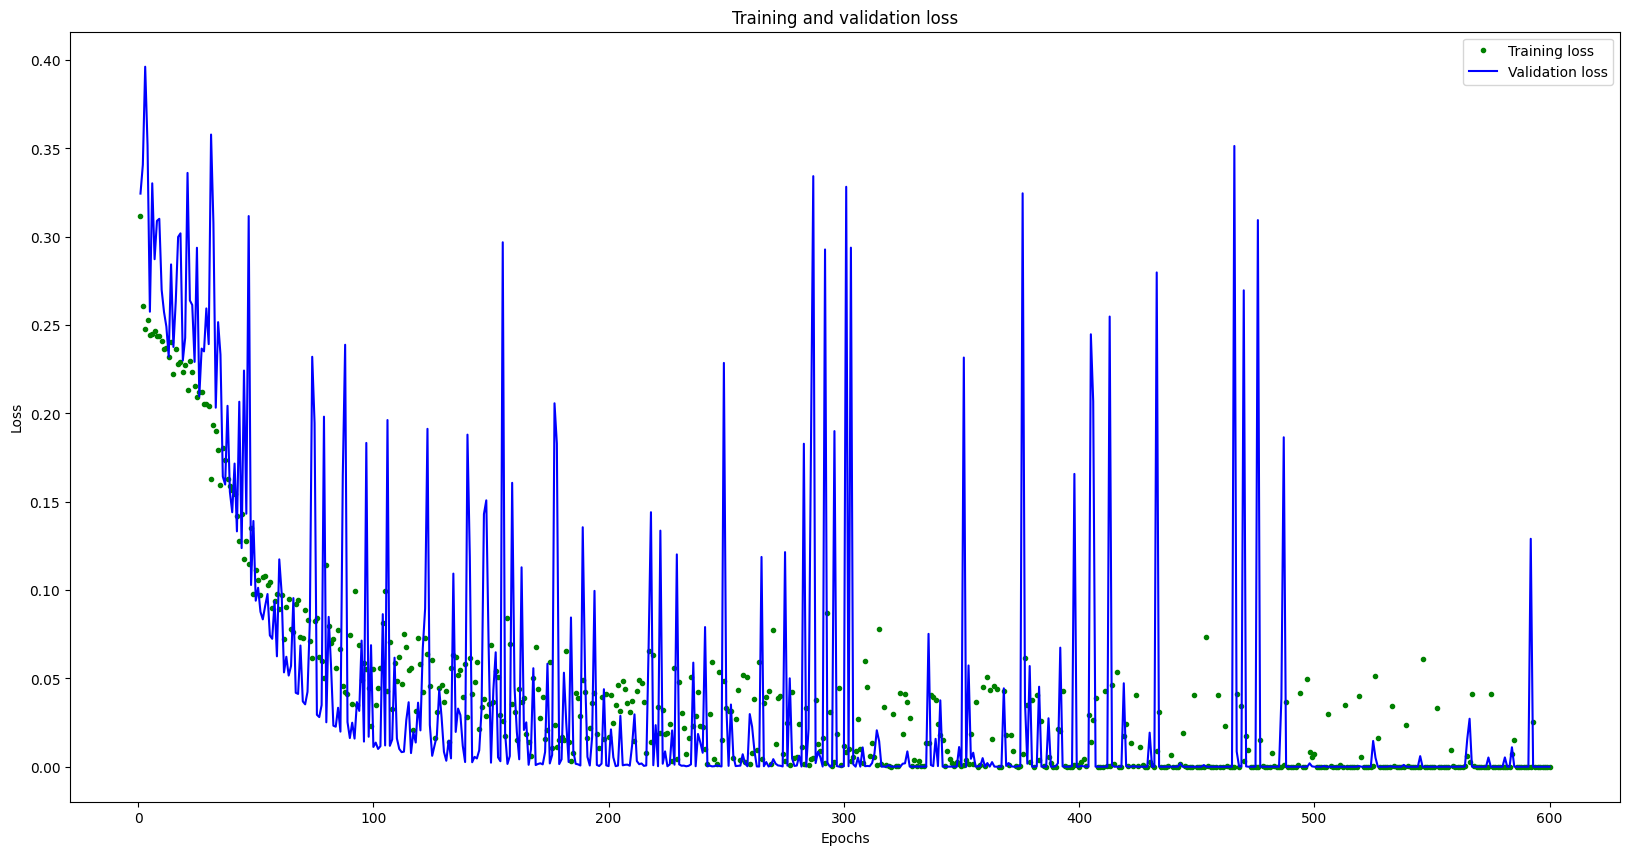

[20.0, 10.0]


In [9]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)


#Le script trace les courbes de perte d'entraînement et de validation du modèle configuré avec une fonction de perte "mean squared error".
#Les graphiques sont personnalisés avec des titres, étiquettes d'axe et légendes.

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

#Commentaire apèrs éxécution : Le modèle est relativement satisfaisant mais risque d'être proche de l'overfitting au vue de l'allure de validation loss. Comme vue précédemment, si le modèle après implémentation n'est pas satisfaisant on peut récolter plus de données par exemple et revoir le modèle

### Graph the loss again, skipping a bit of the start

We'll graph the same data as the previous code cell, but start at index 100 so we can further zoom in once the model starts to converge.

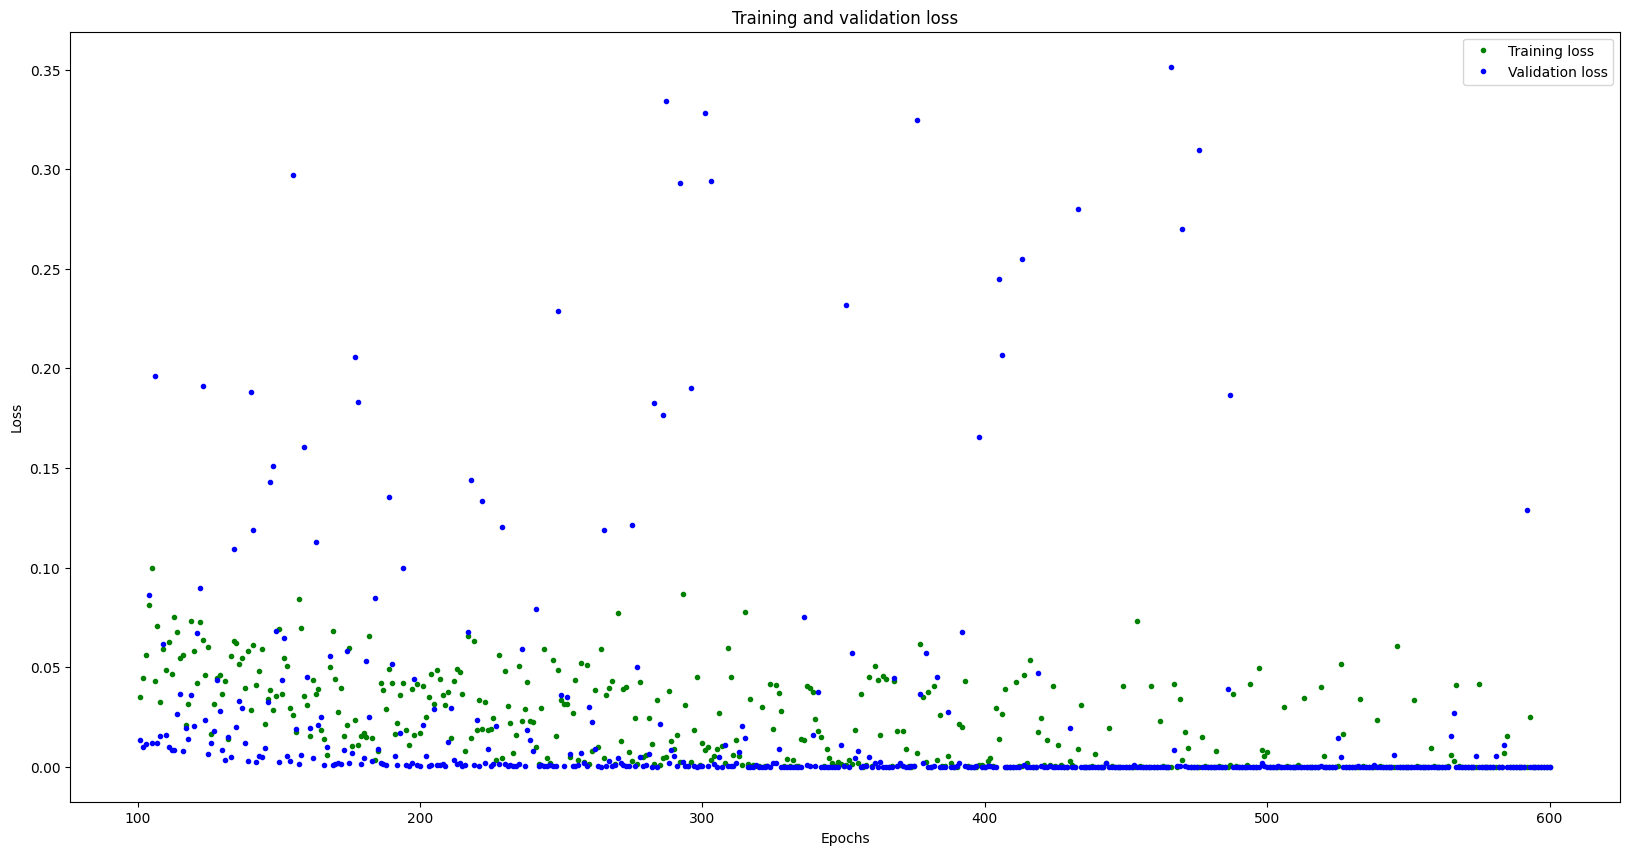

In [10]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Meme commentaire : le modèle tends à faire du surapprentissage, il faudrait produire plus de données

### Graph the mean absolute error

[Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) is another metric to judge the performance of the model.



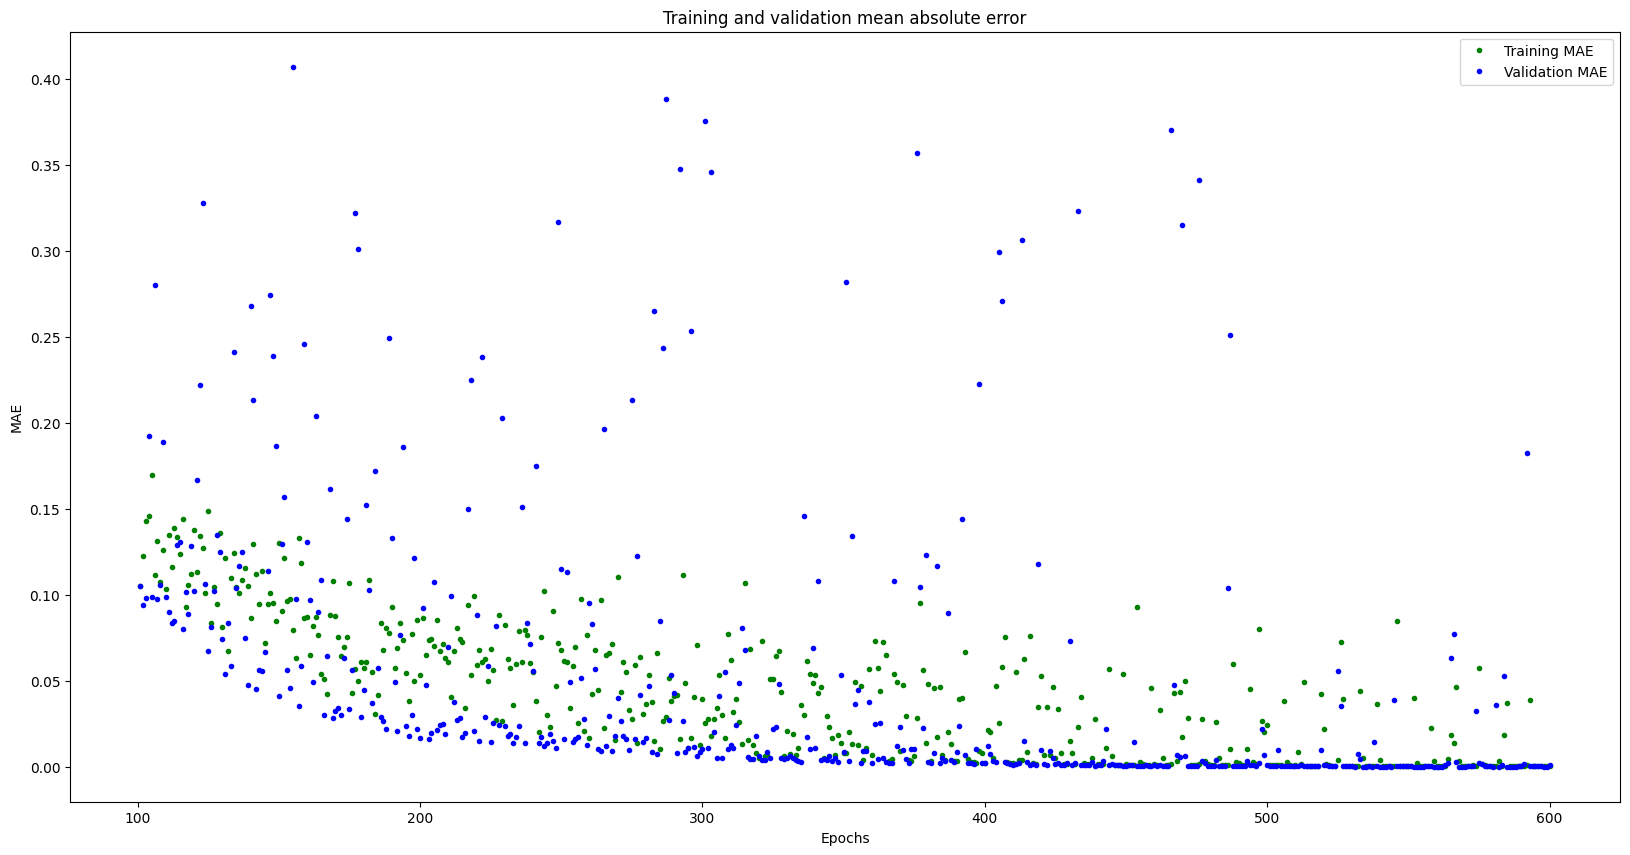

In [11]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


#Pour résoudre l'underfitting :
  #-Prendre plus de data
  #-Feature extraction : prendre un réseaux de neurones profonds (prendre + complexe)
  #-Entrainer plus longtemps
  #-Jouer sur les features (epocs)

#Pour résoudre l'overfitting :
  #-Prendre plus de data
  #-Early stopping (réduire le nb d'épocs)
  #-Réduire la complexité du modèle
  #-Drop-out du neurone (perdre du neurone, ex du k.o)


### Run with Test Data
Put our test data into the model and compare the predictions vs actual output


In [12]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

#Interprétation du résultat : Les résultats indiquent que le modèle a une performance générale assez bonne.

1/1 [==============================] - 0s 174ms/step
predictions =
 [[0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.026 0.974]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]]
actual =
 [[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


# Convert the Trained Model to Tensor Flow Lite

The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.

In [13]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

#Conversion du modèle

Model is 148280 bytes


## Encode the Model in an Arduino Header File

The next cell creates a constant byte array that contains the TFlite model. Import the generated model.h file as a tab into your Arduino sketch.

In [14]:
!echo "const unsigned char model[] __attribute__((aligned(4))) = {"  > /content/model.h
!cat gesture_model.tflite | xxd -i                                  >> /content/model.h
!echo "};"                                                          >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

#Exportation du modèle TFlite dans une bilbiothèque arduino.

Header file, model.h, is 914,456 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


# Classifying IMU Data

Now it's time to switch back to the tutorial instructions and run our new model on the Arduino Nano 33 BLE Sense to classify the accelerometer and gyroscope data.
